## Pràctica 1: Part I
#### Pau Bernabé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./covid19.csv')

Font: https://analisi.transparenciacatalunya.cat/Societat-benestar/La-societat-catalana-davant-del-Covid-19-Percepcio/qxjr-krv6

### Dades i dimensions

In [3]:
print("Nombre de files del dataset:", data.shape[0])
print("Nombre de columnes del dataset:", data.shape[1])

Nombre de files del dataset: 4574
Nombre de columnes del dataset: 57


### Columnes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_onada              4574 non-null   int64  
 1   onada                 4574 non-null   int64  
 2   vpdef                 4574 non-null   float64
 3   dia_Enquesta          4574 non-null   int64  
 4   mes_enquesta          4574 non-null   int64  
 5   provincia             4574 non-null   object 
 6   p46                   4574 non-null   object 
 7   zones específiques    4574 non-null   object 
 8   sexe                  4574 non-null   object 
 9   edat_m                4563 non-null   float64
 10  edat_rec              4574 non-null   object 
 11  fills                 4574 non-null   object 
 12  sit_lab               4574 non-null   object 
 13  dies_sortida          3872 non-null   object 
 14  dies_sortida_m        3861 non-null   float64
 15  p25_1Treballar       

### Nom columnes

Les dades s'han extret de la web de dades obertes de la Generalitat de Catalunya, per tant, es poden reanomenar les columnes per a que siguin més llegibles.

In [5]:
column_rename_dict = {
    'edat_m': 'Edat',
    'edat_rec': 'Grup_Edat',
    'sit_lab': 'Situacio_laboral',
    'p46': 'Dimensio_municipi',
    'p25_1Treballar': 'Treballar',
    'p25_2comprar': 'Comprar',
    'p25_3gos': 'Gos',
    'p25_4tabac': 'Tabac',
    'p25_5premsa': 'Premsa',
    'p25_6cura_persones': 'Cura_persones',
    'p25_7metge': 'Metge',
    'p25_8compra_familiar': 'Compra_familiar',
    'p25_9alimentar': 'Alimentar',
    'p25_11passejarfills': 'Passejar_fills',
    'p25_97altres': 'Altres',
    'p25_99nc': 'NC',
    'p23_1_nerviós': 'Nerviós',
    'p23_2_irritat': 'Irritat',
    'p23_3_alegre': 'Alegre',
    'p23_4_melancolic': 'Melancolic',
    'p23_5_tens': 'Tens',
    'p23_6_optimista': 'Optimista',
    'p23_7_desanimat': 'Desanimat',
    'p23_8_enutjat': 'Enutjat',
    'p23_9_ansios': 'Ansios',
    'p23_10_apagat': 'Apagat',
    'p23_11_molest': 'Molest',
    'p23_12_animat': 'Animat',
    'p23_13_intranquil': 'Intranquil',
    'p23_14_enfadat': 'Enfadat',
    'p23_15_content': 'Content',
    'p23_16_trist': 'Trist',
    'p31_1': 'Preocupació_Salut',
    'p31_2': 'Preocupació_Salut_Familia',
    'p31_3': 'Preocupació_Salut_Amics',
    'p31_4': 'Preocupació_Salut_Societat',
    'p32_1': 'Preocupació_Economia',
    'p32_2': 'Preocupació_Economia_Familia',
    'p32_3': 'Preocupació_Economia_Amics',
    'p32_4': 'Preocupació_Economia_Societat',
    'dies_m': 'Duracio_Confinament',
    'dies_rec': 'Duracio_Confinament_Codi'
}

# Rename columns using the dictionary
data.rename(columns=column_rename_dict, inplace=True)

#### Un cop s'han canviat els noms de les columnes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_onada                       4574 non-null   int64  
 1   onada                          4574 non-null   int64  
 2   vpdef                          4574 non-null   float64
 3   dia_Enquesta                   4574 non-null   int64  
 4   mes_enquesta                   4574 non-null   int64  
 5   provincia                      4574 non-null   object 
 6   Dimensio_municipi              4574 non-null   object 
 7   zones específiques             4574 non-null   object 
 8   sexe                           4574 non-null   object 
 9   Edat                           4563 non-null   float64
 10  Grup_Edat                      4574 non-null   object 
 11  fills                          4574 non-null   object 
 12  Situacio_laboral               4574 non-null   o

### Valors absents

Es pot veure que el conjunt de dades té valors absents, això es deu a que algunes preguntes de l'enquesta es van afegir un cop ja començada l'enquesta. No obstant això, no es descartaran la majoria de columnes amb un nombre considerable de NaN perquè es perdrien dades referents a les diferents onades de la pandèmia i empobririem el dataset.

In [7]:
columns_with_nan = data.columns[data.isnull().sum() > 1500]
print(columns_with_nan)

Index(['Nerviós', 'Irritat', 'Alegre', 'Melancolic', 'Tens', 'Optimista',
       'Desanimat', 'Enutjat', 'Ansios', 'Apagat', 'Molest', 'Animat',
       'Intranquil', 'Enfadat', 'Content', 'Trist', 'E1', 'E2', 'E3', 'E4'],
      dtype='object')


### Eliminació variables que no es faran servir

In [8]:
data = data.drop(columns=['E1', 'E2', 'E3', 'E4'])

### Anàlisi de les variables

#### Grups d'edat

Els grups més enquestats son els de 31-45 i els de 46-65

<Axes: xlabel='Grup_Edat'>

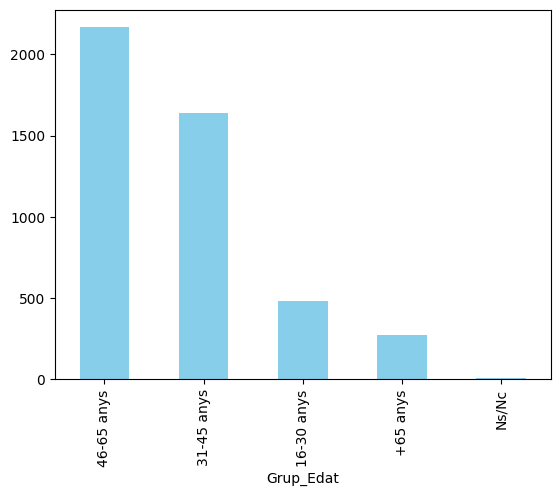

In [9]:
category_counts = data['Grup_Edat'].value_counts()
category_counts.plot(kind='bar', color='skyblue')

#### Sexe

Més dones que homes van respondre l'enquesta

<Axes: xlabel='sexe'>

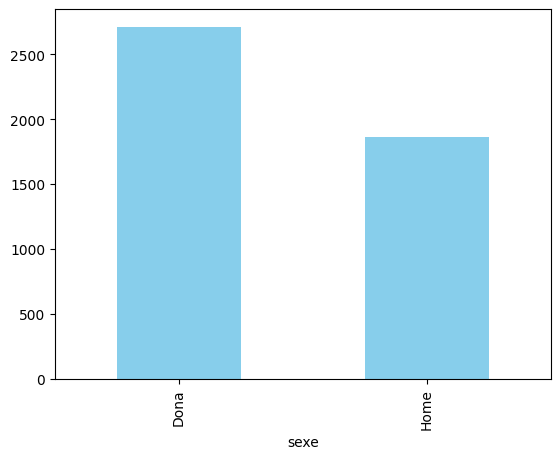

In [10]:
category_counts = data['sexe'].value_counts()
category_counts.plot(kind='bar', color='skyblue')

#### Provincia

La provincia més enquestada va ser Tarragona

<Axes: xlabel='provincia'>

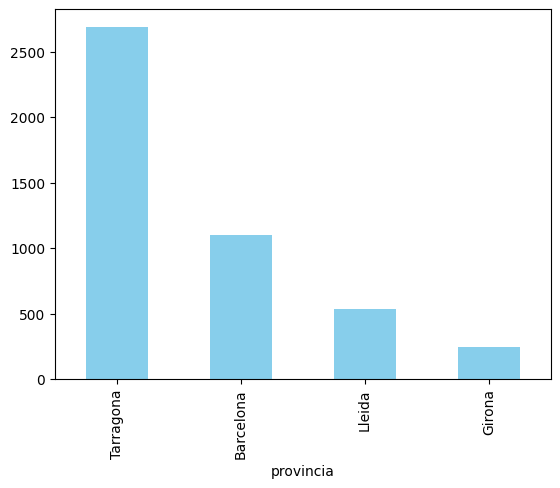

In [11]:
category_counts = data['provincia'].value_counts()
category_counts.plot(kind='bar', color='skyblue')

#### Dimensió municipi
S'analitza la dimensió del municipi de l'enquestat. Els més enquestats viuen en un municipi de més de 100k habitants

<Axes: xlabel='Dimensio_municipi'>

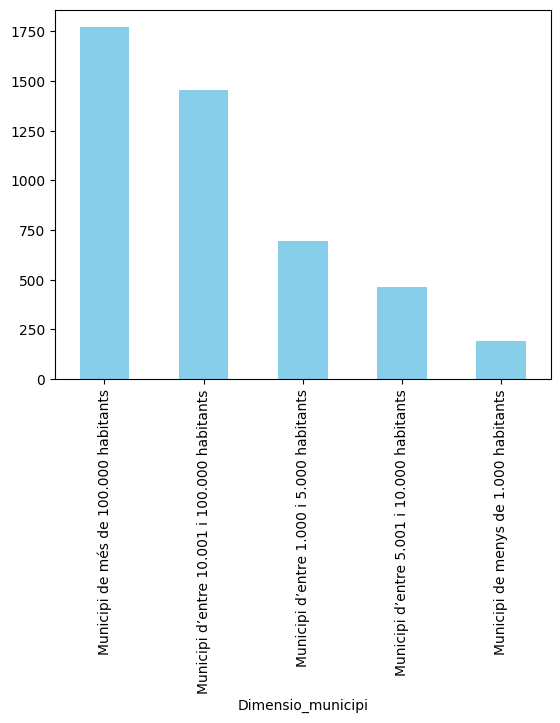

In [12]:
category_counts = data['Dimensio_municipi'].value_counts()
category_counts.plot(kind='bar', color='skyblue')

#### Situació laboral

<Axes: xlabel='Situacio_laboral'>

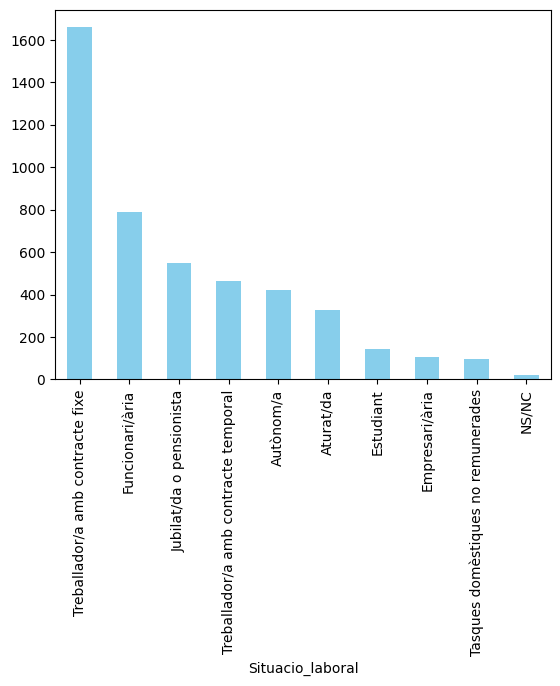

In [13]:
category_counts = data['Situacio_laboral'].value_counts()
category_counts.plot(kind='bar', color='skyblue')

#### Nerviosisme
El conjunt de dades també té en compte les sensacions dels enquestats.
Sent 0 el nivell mínim i 10 el màxim.

<Axes: xlabel='Nerviós'>

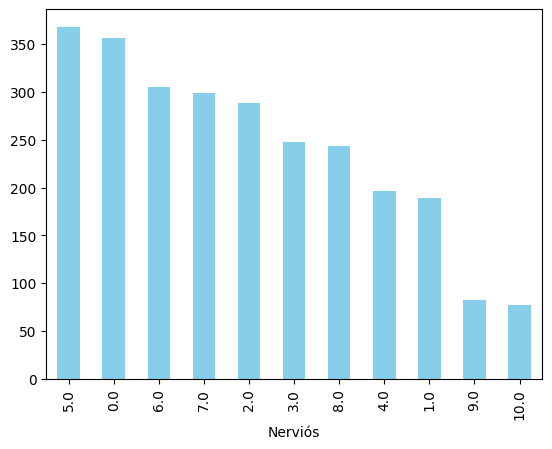

In [14]:
category_counts = data['Nerviós'].value_counts()
category_counts.plot(kind='bar', color='skyblue')

#### Preocupació salut personal


<Axes: xlabel='Preocupació_Salut'>

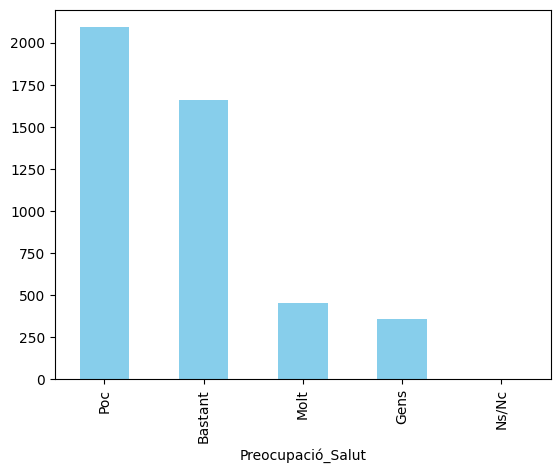

In [15]:
category_counts = data['Preocupació_Salut'].value_counts()
category_counts.plot(kind='bar', color='skyblue')